# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams["figure.figsize"] = (7.0, 4.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

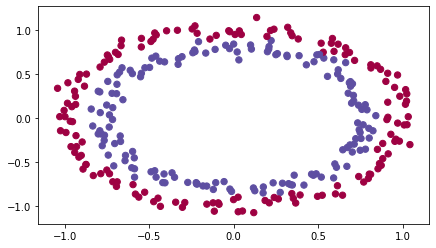

In [2]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [3]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    l = len(layers_dims)
    
    for i in range(1, l):
        parameters["W"+str(i)] = np.zeros(shape = (layers_dims[i], layers_dims[i-1]))
        parameters["b"+str(i)] = np.zeros(shape = (layers_dims[i], 1))
    return parameters

In [4]:
def initialize_parameters_random(layers_dims):
    parameters = {}
    l = len(layers_dims)
    
    for i in range(1, l):
        parameters["W"+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])
        parameters["b"+str(i)] = np.zeros(shape = (layers_dims[i], 1))
    return parameters

In [5]:
def initialize_parameters_he(layers_dims):
    parameters = {}
    l = len(layers_dims)
    
    for i in range(1, l):
        parameters["W"+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1]) * np.sqrt(2. / layers_dims[i-1])
        parameters["b"+str(i)] = np.zeros(shape = (layers_dims[i], 1))
    return parameters

In [6]:
# test case
parameters = initialize_parameters_zeros([3,2,1])
print("Zeros initialization")
print("W1: " + str(parameters["W1"]))
print("b1: " + str(parameters["b1"]))
print("W2: " + str(parameters["W2"]))
print("b2: " + str(parameters["b2"]))
print()

parameters = initialize_parameters_random([3,2,1])
print("Random initialization")
print("W1: " + str(parameters["W1"]))
print("b1: " + str(parameters["b1"]))
print("W2: " + str(parameters["W2"]))
print("b2: " + str(parameters["b2"]))
print()

parameters = initialize_parameters_he([3,2,1])
print("He initialization")
print("W1: " + str(parameters["W1"]))
print("b1: " + str(parameters["b1"]))
print("W2: " + str(parameters["W2"]))
print("b2: " + str(parameters["b2"]))

Zeros initialization
W1: [[0. 0. 0.]
 [0. 0. 0.]]
b1: [[0.]
 [0.]]
W2: [[0. 0.]]
b2: [[0.]]

Random initialization
W1: [[-0.77614149 -0.27733407  0.70200454]
 [-1.20851869 -0.10068627  0.29372577]]
b1: [[0.]
 [0.]]
W2: [[-1.33808203  1.91630366]]
b2: [[0.]]

He initialization
W1: [[ 1.17295632  0.11264243  0.74225638]
 [ 1.8099633   0.45922966 -0.78338001]]
b1: [[0.]
 [0.]]
W2: [[ 0.75296471 -0.45241986]]
b2: [[0.]]


In [7]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print("Cost after iteration {}: {}".format(i, cost))
    
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.title("Learning rate: " + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599455
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


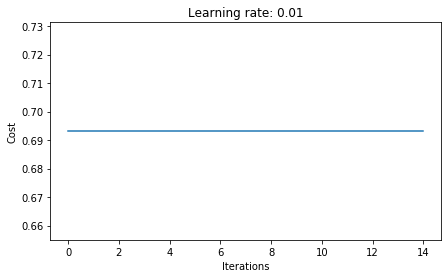

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [8]:
# initialize_parameters_zero
parameters = model(train_X, train_Y, initialization = "zeros")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [9]:
print("Prediction_train: " + str(predictions_train))
print("Prediction_test: " + str(predictions_test))

Prediction_train: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
Prediction_test: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


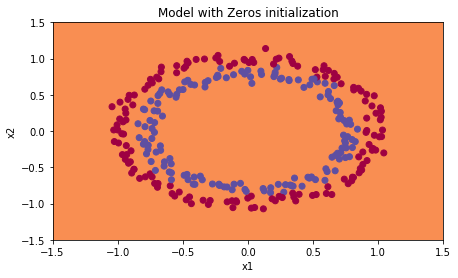

In [10]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.8458060461424518
Cost after iteration 1000: 0.6075390586615798
Cost after iteration 2000: 0.5118872443988643
Cost after iteration 3000: 0.38049551523088776
Cost after iteration 4000: 0.27683804097680603
Cost after iteration 5000: 0.20998915707093138
Cost after iteration 6000: 0.15963397177180616
Cost after iteration 7000: 0.11458916500929624
Cost after iteration 8000: 0.0830136591946008
Cost after iteration 9000: 0.06771735770858996
Cost after iteration 10000: 0.057916319663954705
Cost after iteration 11000: 0.05075266039962724
Cost after iteration 12000: 0.04524460692344934
Cost after iteration 13000: 0.04092587346270363
Cost after iteration 14000: 0.0372257834607003


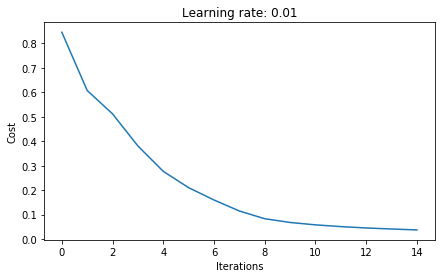

On the train set:
Accuracy: 1.0
On the test set:
Accuracy: 0.97


In [11]:
# initialize_parameters_random
parameters = model(train_X, train_Y, initialization = "random")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

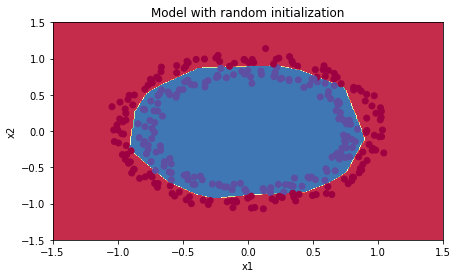

In [12]:
plt.title("Model with random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after iteration 0: 0.9925835106677365
Cost after iteration 1000: 0.6857324957152157
Cost after iteration 2000: 0.6714848840625172
Cost after iteration 3000: 0.656923647653524
Cost after iteration 4000: 0.6348735279433694
Cost after iteration 5000: 0.5530845884745744
Cost after iteration 6000: 0.4393919313609748
Cost after iteration 7000: 0.3218808812135176
Cost after iteration 8000: 0.22723388072909237
Cost after iteration 9000: 0.16125955774649028
Cost after iteration 10000: 0.12270795436382988
Cost after iteration 11000: 0.0841877303125643
Cost after iteration 12000: 0.0672518505452736
Cost after iteration 13000: 0.05669909861828186
Cost after iteration 14000: 0.049574059642044935


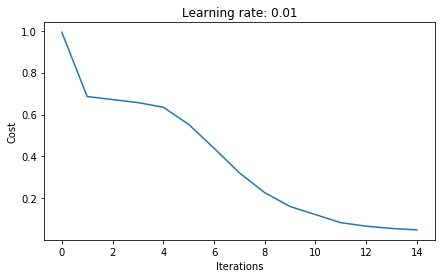

On the train set:
Accuracy: 0.9966666666666667
On the test set:
Accuracy: 0.99


In [13]:
# initialize_parameters_he
parameters = model(train_X, train_Y, initialization = "he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

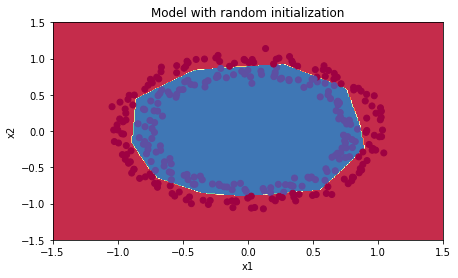

In [14]:
plt.title("Model with random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)